## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 


## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Analysis
* From the "City Latitude vs. Max Temperature" plot, the warmest cities lie closest to a latitude of 0, being the equator. This trend occurs because the further away from the equator a city lays, the sun reaches cities with less intensity and frequency.
* The "City Latitude vs. Cloudiness" plot does not show too much of a trend in comparing the two data factors. However, there is an accumulation of data points at the cloudiness levels of 0%, 75% and 90%. More cities in the higher latitude ranges reported lower levels of cloudiness, compared to cities in lower latitudes.
* Based on the "City Latitude vs. Wind Speed" plot, cities furthest north from the equator are likelier than other cities to have wind speeds in excess of 25 miles per hour.

In [1]:
# dependencies

import openweathermapy.core as ow
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import pandas as pd
import numpy as np
from citipy import citipy

In [2]:
# for jupyter notebooks specifically
%matplotlib inline

In [3]:
# save config information

api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
# build partial query url

#query_url = url + "appid=" + api_key + "&units=" + units + "&q="
#query_url

#optimized
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q='

In [5]:
#define lists and dictionaries for below loop
    
randomLat = []
randomLong = []
cities = []
countryCode = []
name = []
weatherJson = []
weatherDict = {}

In [6]:
# loop through the list of cities and perform a request for data on each

for c in range (1500):
    randomLat = np.random.uniform(low=-90, high=90, size=1)
    randomLong =np.random.uniform(low=-180, high=180, size=1)
    cityname = citipy.nearest_city(randomLat, randomLong)
    if cityname not in cities:
        cities.append(cityname)
print(len(cities))

#if break statement for len(cities)==501

602


In [7]:
# data retrieval and printing city urls

c=1
for city in cities:
    name.append(city.city_name)
    countryCode.append(city.country_code)
    response = req.get(query_url+city.city_name).json()
    print("Processing Record "+str(c)+" of "+ str(len(cities))+" "+query_url+city.city_name)
    weatherJson.append(response)
    c +=1
    
print("-"*100)

Processing Record 1 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=constitucion
Processing Record 2 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=abalak
Processing Record 3 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cape town
Processing Record 4 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=longyearbyen
Processing Record 5 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=manzhouli
Processing Record 6 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=butaritari
Processing Record 7 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=arraial do cabo
Processing

Processing Record 60 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vanavara
Processing Record 61 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=peto
Processing Record 62 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hun
Processing Record 63 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wa
Processing Record 64 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chiriqui grande
Processing Record 65 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro
Processing Record 66 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ancud
Processing Record 67 of 602 ht

Processing Record 119 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gizo
Processing Record 120 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=klaksvik
Processing Record 121 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=airai
Processing Record 122 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=balsas
Processing Record 123 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=salalah
Processing Record 124 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mar del plata
Processing Record 125 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lorengau
Processing Record 

Processing Record 177 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chifeng
Processing Record 178 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pevek
Processing Record 179 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=clyde river
Processing Record 180 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rodino
Processing Record 181 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=camacha
Processing Record 182 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vao
Processing Record 183 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=makakilo city
Processing Record

Processing Record 235 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ilulissat
Processing Record 236 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=manati
Processing Record 237 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tubuala
Processing Record 238 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sento se
Processing Record 239 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pechenga
Processing Record 240 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=buala
Processing Record 241 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nanakuli
Processing Record 

Processing Record 294 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pontian kecil
Processing Record 295 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=jizan
Processing Record 296 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=siverek
Processing Record 297 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=santa maria
Processing Record 298 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=espanola
Processing Record 299 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rosario
Processing Record 300 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dakar
Processing Re

Processing Record 352 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sentyabrskiy
Processing Record 353 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=klin
Processing Record 354 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yerbogachen
Processing Record 355 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tonj
Processing Record 356 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=carbonia
Processing Record 357 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hovd
Processing Record 358 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=attawapiskat
Processing Rec

Processing Record 411 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=boende
Processing Record 412 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=skjervoy
Processing Record 413 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=farsund
Processing Record 414 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dalbandin
Processing Record 415 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kolondieba
Processing Record 416 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tsentralnyy
Processing Record 417 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=eyl
Processing Reco

Processing Record 470 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ruatoria
Processing Record 471 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=batagay
Processing Record 472 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=narsaq
Processing Record 473 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=copiapo
Processing Record 474 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=batticaloa
Processing Record 475 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=humaita
Processing Record 476 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tripoli
Processing Record

Processing Record 528 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=praia da vitoria
Processing Record 529 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hamilton
Processing Record 530 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=riyadh
Processing Record 531 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=belozerskoye
Processing Record 532 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mount gambier
Processing Record 533 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tarko-sale
Processing Record 534 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port-

Processing Record 587 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sistranda
Processing Record 588 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barbar
Processing Record 589 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=piacabucu
Processing Record 590 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fort nelson
Processing Record 591 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=progreso
Processing Record 592 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=katobu
Processing Record 593 of 602 http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=grand river south eas

In [8]:
# setting init lists

latData = []
longData = []
tempMax = []
cityData = []
country = []
humiData = []
cldData = []
windData = []

In [9]:
#display the city data frames

for data in weatherJson:
    try:
        lat1 = data.get("coord").get("lat")
        latData.append(lat1)
        long1 = data.get("coord").get("lon")
        longData.append(long1)
        temp1 = data.get("main").get("temp_max")
        tempMax.append(temp1)
        city1 = data.get("name")
        cityData.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
        humi1 = data.get("main").get("humidity")
        humiData.append(humi1)
        cld1 = data.get("clouds").get("all")
        cldData.append(cld1)
        wind1 = data.get("wind").get("speed")
        windData.append(wind1)


    except:
        pass

    continue

weatherDict = {"Latitude": latData, 
               "Longitude":longData, 
               "City":cityData, 
               "Country":country,
               "Humidity": humiData, 
               "Cloudiness":cldData,
               "Wind Speed":windData, 
               "Max Temp":tempMax}
weather_df = pd.DataFrame(weatherDict)
weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Constitucion,20,MX,26,23.99,-104.67,78.80,12.75
1,Abalak,0,NE,53,15.46,6.28,64.07,3.40
2,Cape Town,0,ZA,68,-33.93,18.42,66.20,17.22
3,Longyearbyen,20,NO,61,78.22,15.63,12.20,11.41
4,Manzhouli,44,CN,80,49.60,117.43,1.97,7.31


In [10]:
weather_df.to_csv("weatherPy.csv",encoding="utf-8",index=False)

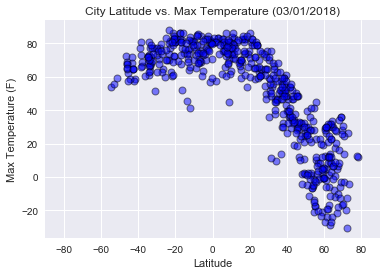

In [12]:
# Scatter Plot: Temperature (F) vs. Latitude

plt.scatter(weather_df["Latitude"], 
            weather_df["Max Temp"], 
            c="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Temp")

plt.title("City Latitude vs. Max Temperature (03/01/2018)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.ylabel("Max Temperature (F)")
plt.grid(True)
sns.set()

plt.savefig("Latitude vs. Temperature (F).png")
plt.show()


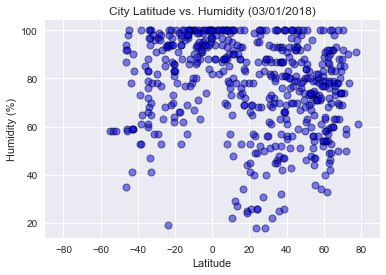

In [13]:
# Scatter Plot: Humidity (%) vs. Latitude

plt.scatter(weather_df["Latitude"], 
            weather_df["Humidity"], 
            c="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Humidity")

plt.title("City Latitude vs. Humidity (03/01/2018)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.ylabel("Humidity (%)")
plt.grid(True)
sns.set()

plt.savefig("Latitude vs. Humidity (%).png")
plt.show()

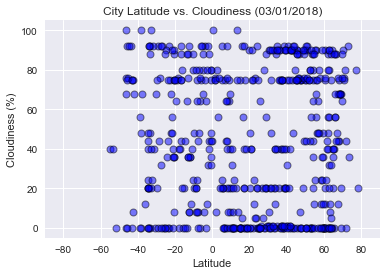

In [14]:
# Scatter Plot: Cloudiness (%) vs. Latitude

plt.scatter(weather_df["Latitude"], 
            weather_df["Cloudiness"], 
            c="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cloudiness")

plt.title("City Latitude vs. Cloudiness (03/01/2018)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.ylabel("Cloudiness (%)")
plt.grid(True)
sns.set()

plt.savefig("Latitude vs. Cloudiness (%).png")
plt.show()

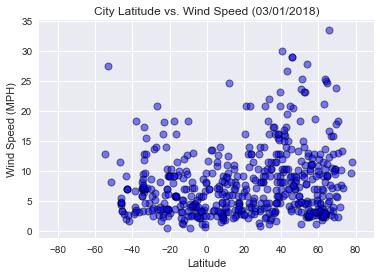

In [15]:
# Scatter Plot: Wind Speed (mph) vs. Latitude

plt.scatter(weather_df["Latitude"], 
            weather_df["Wind Speed"], 
            c="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="wind speed")

plt.title("City Latitude vs. Wind Speed (03/01/2018)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)
sns.set()

plt.savefig("Latitude vs. Wind Speed (MPH).png")
plt.show()